In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from google.colab import files
uploaded = files.upload()


flight_df = pd.read_excel('flight_price.xlsx')


flight_df.head()


Saving flight_price.xlsx to flight_price (3).xlsx


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:

print(f"Dataset size: {flight_df.shape}")
print(flight_df.info())


print(df.head())
print(df.tail())


print(flight_df.isna().sum())


clean_df = flight_df.dropna().copy()


Dataset size: (10683, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None
       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR 

In [ ]:

clean_df['Journey_Date'] = pd.to_datetime(clean_df['Date_of_Journey'])
clean_df['Journey_Day'] = clean_df['Journey_Date'].dt.day
clean_df['Journey_Month'] = clean_df['Journey_Date'].dt.month

clean_df['Dep_Time_dt'] = pd.to_datetime(clean_df['Dep_Time'])
clean_df['Dep_Hour'] = clean_df['Dep_Time_dt'].dt.hour
clean_df['Dep_Minute'] = clean_df['Dep_Time_dt'].dt.minute

clean_df['Arr_Time_dt'] = pd.to_datetime(clean_df['Arrival_Time'])
clean_df['Arr_Hour'] = clean_df['Arr_Time_dt'].dt.hour
clean_df['Arr_Minute'] = clean_df['Arr_Time_dt'].dt.minute


In [ ]:

def parse_duration(duration_str):
    hours = 0
    minutes = 0
    duration_str = duration_str.strip()
    if 'h' in duration_str:
        hours = int(duration_str.split('h')[0])
        duration_str = duration_str.split('h')[1]
    if 'm' in duration_str:
        minutes = int(duration_str.replace('m', '').strip())
    return hours * 60 + minutes

clean_df['Total_Duration_Min'] = clean_df['Duration'].apply(parse_duration)


In [ ]:

stop_mapping = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}
clean_df['Stops_Num'] = clean_df['Total_Stops'].map(stop_mapping).astype(int)


In [ ]:

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for column in ['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']:
    clean_df[column] = encoder.fit_transform(clean_df[column])


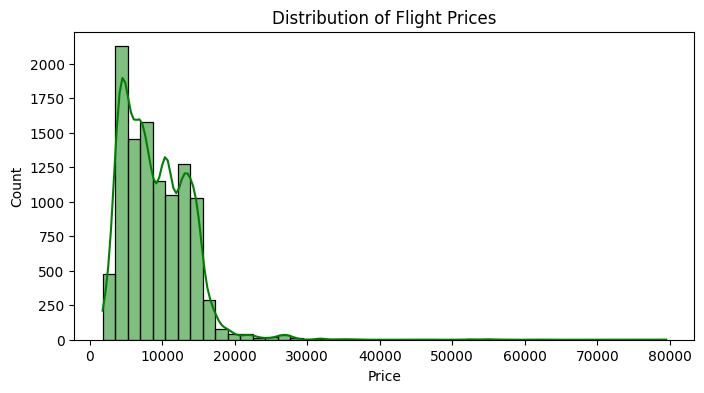

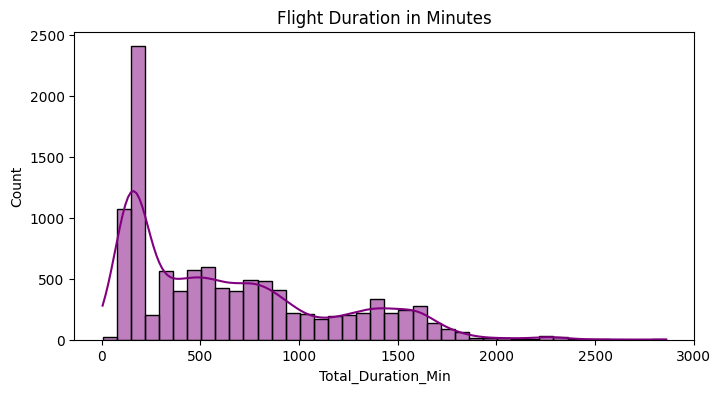

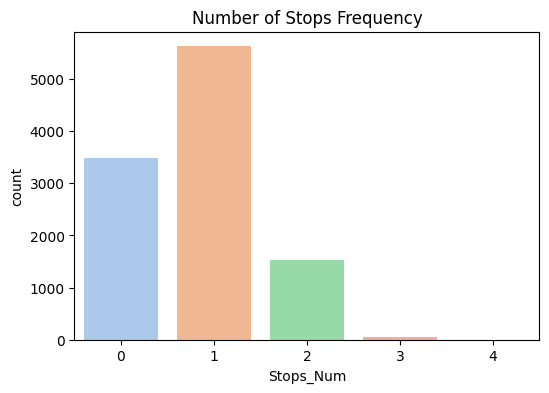

In [ ]:



plt.figure(figsize=(8,4))
sns.histplot(clean_df['Price'], bins=45, color='green', kde=True)
plt.title('Distribution of Flight Prices')
plt.show()


plt.figure(figsize=(8,4))
sns.histplot(clean_df['Total_Duration_Min'], bins=40, color='purple', kde=True)
plt.title('Flight Duration in Minutes')
plt.show()


plt.figure(figsize=(6,4))
sns.countplot(x='Stops_Num', data=clean_df, palette='pastel')
plt.title('Number of Stops Frequency')
plt.show()


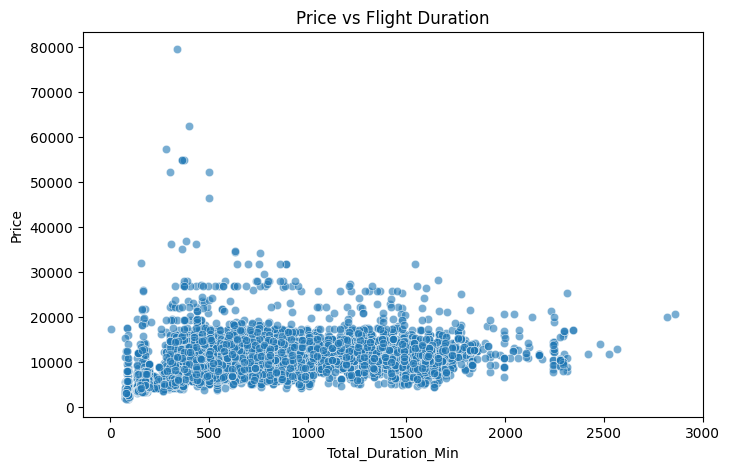

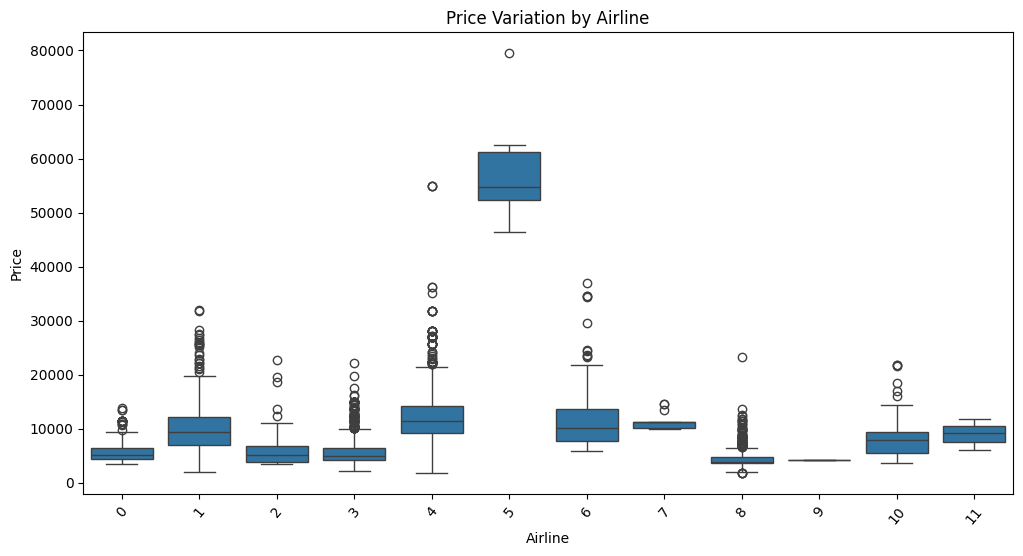

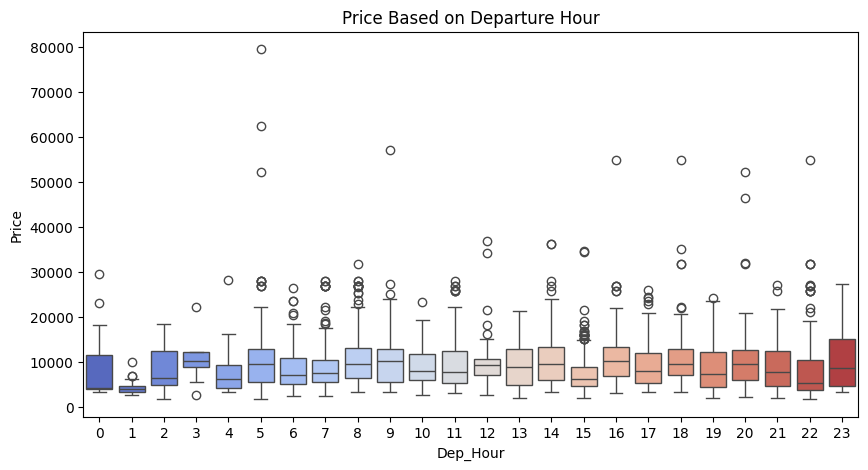

In [ ]:



plt.figure(figsize=(8,5))
sns.scatterplot(x='Total_Duration_Min', y='Price', data=clean_df, alpha=0.6)
plt.title('Price vs Flight Duration')
plt.show()


plt.figure(figsize=(12,6))
sns.boxplot(x='Airline', y='Price', data=clean_df)
plt.title('Price Variation by Airline')
plt.xticks(rotation=50)
plt.show()


plt.figure(figsize=(10,5))
sns.boxplot(x='Dep_Hour', y='Price', data=clean_df, palette='coolwarm')
plt.title('Price Based on Departure Hour')
plt.show()


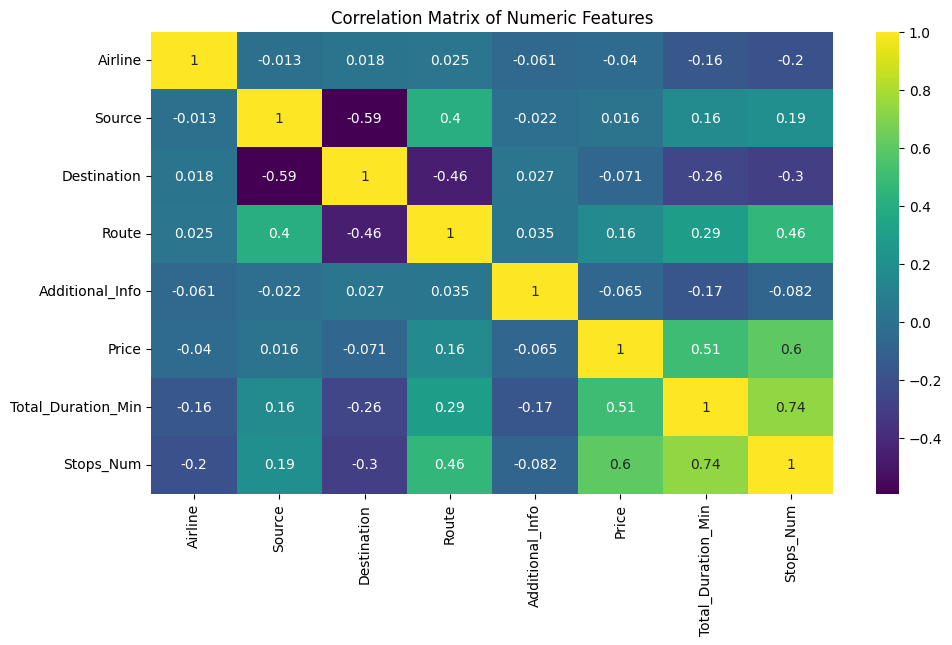

In [ ]:

numeric_data = clean_df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(11,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [ ]:

def time_segment(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

clean_df['Dep_Time_Segment'] = clean_df['Dep_Hour'].apply(time_segment)


clean_df['Weekday_Num'] = clean_df['Journey_Date'].dt.dayofweek
clean_df['Is_Weekend'] = clean_df['Weekday_Num'].apply(lambda x: 1 if x >=5 else 0)


clean_df['Rush_Hour_Flag'] = clean_df['Dep_Hour'].apply(lambda h: 1 if h in [7,8,17,18] else 0)


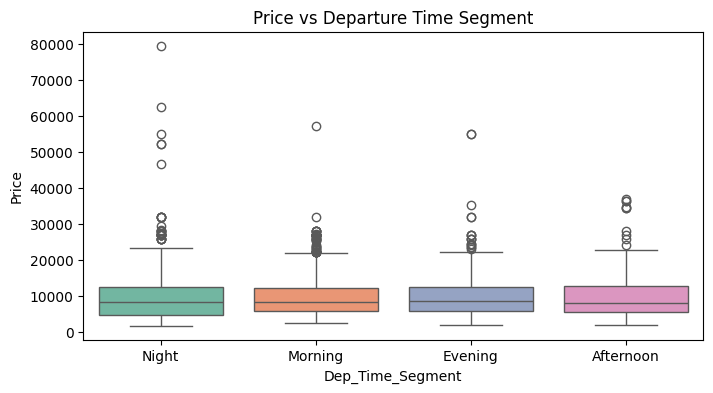

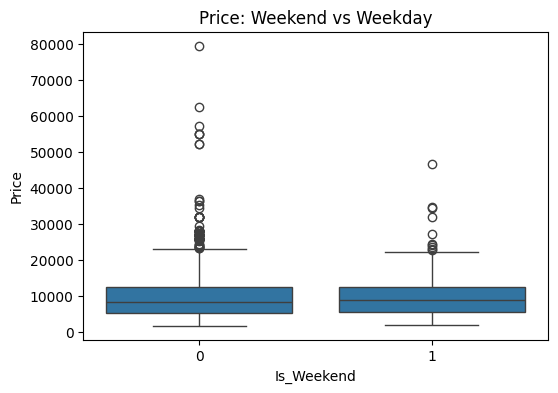

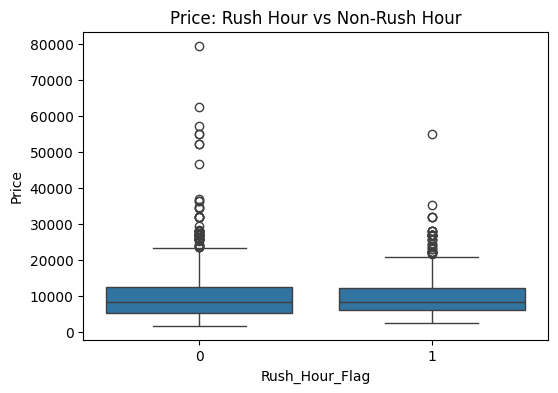

In [ ]:


plt.figure(figsize=(8,4))
sns.boxplot(x='Dep_Time_Segment', y='Price', data=clean_df, palette='Set2')
plt.title('Price vs Departure Time Segment')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Is_Weekend', y='Price', data=clean_df)
plt.title('Price: Weekend vs Weekday')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Rush_Hour_Flag', y='Price', data=clean_df)
plt.title('Price: Rush Hour vs Non-Rush Hour')
plt.show()


In [ ]:


print("""
Key Findings:

- Flights with more stops and longer durations usually have higher prices.
- Departure during rush hours or weekends correlates with increased fares.
- Airlines differ notably in pricing strategies.
- Price trends follow clear daily time segments, with morning and night generally cheaper.
- Travelers can save by booking flights outside peak hours and weekdays.
""")



Key Findings:

- Flights with more stops and longer durations usually have higher prices.
- Departure during rush hours or weekends correlates with increased fares.
- Airlines differ notably in pricing strategies.
- Price trends follow clear daily time segments, with morning and night generally cheaper.
- Travelers can save by booking flights outside peak hours and weekdays.

